### 라이브러리 로드

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus = False)

# 그래프가 노트북 안에 보기에 하기 위해
%matplotlib inline

## 데이터 로드

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [3]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


## Q1. 전국 시도별 약국수를 구해주세요!

- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 
- 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [4]:
df.loc[df['상권업종소분류명'] == '약국', '시도명'].value_counts()

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64

## Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
- 다음의 결과가 나오도록 구합니다.

### 나의 생각
- 동물병원이 병원이나 약국이 많은 곳에 있는지 알고싶다면 어떤걸 조사해야할까?
    1. 동물병원이 (병원 and 약국)이 있는곳과 많은지 비교
    2. 동물병원이 (병원 and 약국)을 제외한 나머지와 많이 있는지 비교
    3. 1 and 2의 비율을 통해 어느곳에 더 많은지 비교 가능

In [37]:
df.loc[df['상권업종소분류명'] == '동물병원', '시도명'].value_counts()

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64

In [6]:
n = df.loc[df['상권업종소분류명'] == '약국', '시도명'].value_counts(normalize=True)
n

시도명
경기도        0.238827
서울특별시      0.189526
부산광역시      0.059839
경상남도       0.053855
인천광역시      0.053061
경상북도       0.048454
대구광역시      0.046071
전라북도       0.045647
충청남도       0.043953
전라남도       0.042946
강원도        0.038604
광주광역시      0.036592
충청북도       0.034315
대전광역시      0.031932
울산광역시      0.019170
제주특별자치도    0.011968
세종특별자치시    0.005243
Name: proportion, dtype: float64

<Axes: ylabel='시도명'>

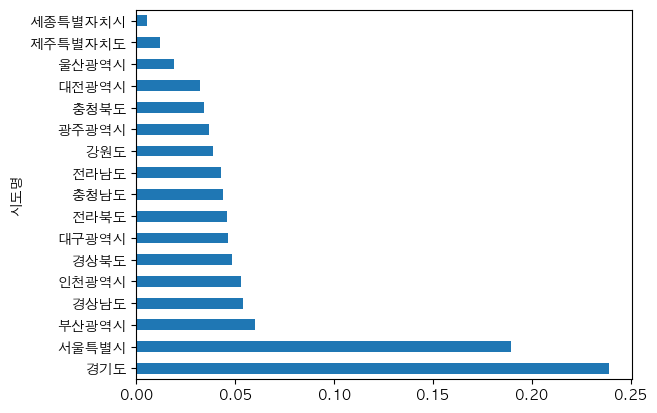

In [7]:
n.plot.barh()

In [8]:
# 동물병원의 갯수
c = df.loc[df['상권업종소분류명'] == '동물병원', '시도명'].value_counts(normalize=True)
c

시도명
경기도        0.321348
서울특별시      0.180434
인천광역시      0.062520
경상북도       0.053450
경상남도       0.052154
부산광역시      0.049563
충청남도       0.042436
대구광역시      0.038549
전라북도       0.035957
강원도        0.027535
대전광역시      0.024943
전라남도       0.024943
충청북도       0.024295
광주광역시      0.023000
울산광역시      0.019760
제주특별자치도    0.014901
세종특별자치시    0.004211
Name: proportion, dtype: float64

<Axes: ylabel='시도명'>

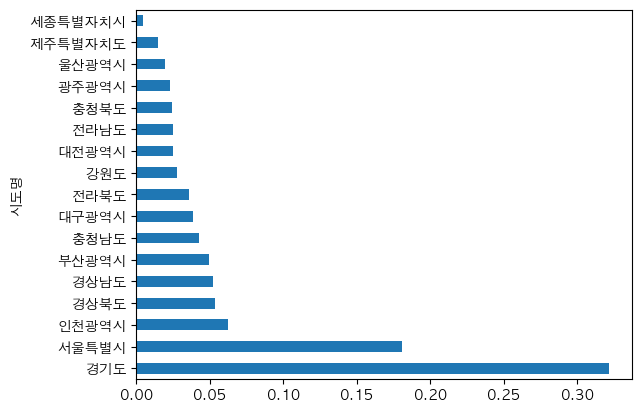

In [9]:
c.plot.barh()

In [10]:
h = df.loc[df['상권업종소분류명'] == '일반병원', '시도명'].value_counts(normalize=True)
h

시도명
경기도        0.227165
서울특별시      0.189205
부산광역시      0.074140
경상남도       0.059015
경상북도       0.053381
전라북도       0.051008
인천광역시      0.048932
전라남도       0.045374
충청남도       0.042705
대구광역시      0.040036
대전광역시      0.035884
충청북도       0.032918
광주광역시      0.032325
강원도        0.028470
울산광역시      0.021056
제주특별자치도    0.015125
세종특별자치시    0.003262
Name: proportion, dtype: float64

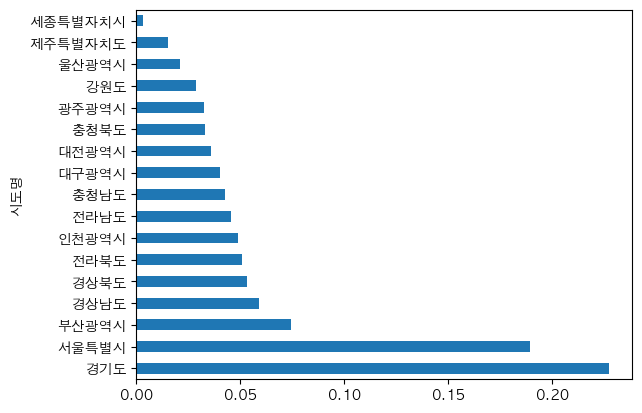

In [11]:
h.plot.barh();

In [12]:
null_df = pd.DataFrame()

In [13]:
null_df['동물병원'] = c
null_df['약국'] = n
null_df['일반병원'] = h

Text(0.5, 1.0, '동물병원, 일반병원, 약국 지역별 빈도')

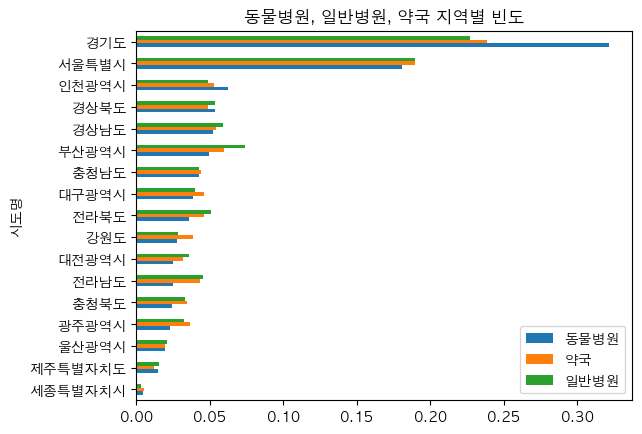

In [14]:
null_df.sort_values('동물병원').plot(kind='barh')

plt.title('동물병원, 일반병원, 약국 지역별 빈도')

In [15]:
null_df

,동물병원,약국,일반병원
시도명,,,
경기도,0.321348,0.238827,0.227165
서울특별시,0.180434,0.189526,0.189205
인천광역시,0.062520,0.053061,0.048932
경상북도,0.053450,0.048454,0.053381
경상남도,0.052154,0.053855,0.059015
부산광역시,0.049563,0.059839,0.074140
충청남도,0.042436,0.043953,0.042705
대구광역시,0.038549,0.046071,0.040036
전라북도,0.035957,0.045647,0.051008


### scatter plot을 통한 시각화 분석

<Axes: xlabel='경도', ylabel='위도'>

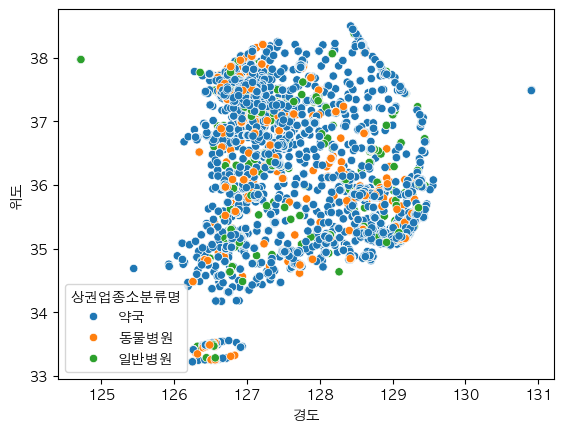

In [36]:
df_2 = df[df['상권업종소분류명'].str.contains('약국|동물병원|일반병원')]

sns.scatterplot(data=df_2, x='경도', y='위도', hue='상권업종소분류명')

## Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
- 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
- 비율이 높은 순서대로 정렬되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

### 나의 생각
1. 서울 소재!
    - 차례로 서울을 먼저 구별했습니다.
2. 병원!
    - '상권업종중분류명'에서 병원을 구별했습니다.
3. "피부" or "성형"
    - '상권업종소분류명'에서 str.contains()를 통해 구별했습니다.
4. 먼저 강남지역에 많이 존재하는지를 우선 파악해봤습니다.
5. 그 다음 문제에서 피부과 + 성형외과 수 / 전체병원 수 의 비율을 구하였습니다.

- 분석을 하면서 예상대로 강남과 그 주변 지역에 많은 분포가 있다는 걸 알 수 있었습니다.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [43]:
#  & ((df['상권업종소분류명'].str.contains('성형')) | (df['상권업종소분류명'].str.contains('피부'))
# 서울지역만 색인하기
df_seoul = df[(df['시도명'] == '서울특별시')].copy()
df_seoul.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3,NaN,127.027878,37.514144
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
33,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1,NaN,127.028023,37.498656


In [53]:
# 병원만 색인하기
df_seoul_hospital = df_seoul[df_seoul['상권업종중분류명'] == '병원'].copy()
df_seoul_hospital.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3,NaN,127.027878,37.514144


In [77]:
# 피부과 or 성형외과의 서울 기준 구별 분포도
# 강남의 경우가 가장 많은 비율을 차지하고 있다.
c1 = df_seoul_hospital['상권업종소분류명'].str.contains('피부|성형')
df_seoul_hospital.loc[(c1), '시군구명'].value_counts(normalize=True)

시군구명
강남구     0.439184
서초구     0.145666
송파구     0.034960
마포구     0.029133
영등포구    0.028405
강서구     0.027677
광진구     0.026948
강동구     0.026948
중구      0.022578
은평구     0.022578
서대문구    0.021122
성북구     0.020393
동대문구    0.019665
양천구     0.018937
노원구     0.018937
중랑구     0.015295
성동구     0.012382
구로구     0.012382
관악구     0.012382
동작구     0.010197
강북구     0.008740
종로구     0.008012
용산구     0.007283
금천구     0.006555
도봉구     0.003642
Name: proportion, dtype: float64

In [78]:
# 피부과 + 성형외과 수 / 서울 전체 병원 수
df_count = df_seoul_hospital.loc[(c1), '시군구명'].value_counts() / df_seoul_hospital['시군구명'].value_counts()
df_count.sort_values(ascending=False).round(2)

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
서대문구    0.08
영등포구    0.08
강동구     0.07
중구      0.07
중랑구     0.07
강서구     0.07
양천구     0.07
송파구     0.06
광진구     0.06
은평구     0.06
성북구     0.06
구로구     0.06
금천구     0.05
노원구     0.05
성동구     0.05
강북구     0.05
용산구     0.05
관악구     0.04
동대문구    0.04
동작구     0.04
종로구     0.03
도봉구     0.02
Name: count, dtype: float64

## Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

- folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
- folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [83]:
df_silver = df[df['상권업종소분류명'].str.contains('노인/치매병원')]
df_silver.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132


In [93]:
folium_map = folium.Map(location=[df_silver['위도'].mean(), df_silver['경도'].mean()], 
           zoom_start=6)

for n in df_silver.index:
    name = df_silver.loc[n, '상호명']
    addr = df_silver.loc[n, '도로명주소']
    popup = f'{name}-{addr}'
    location = [df_silver.loc[n, '위도'], df_silver.loc[n, '경도']]
    
    folium.Marker(
        location=location,
        popup=popup,
    ).add_to(folium_map)
    
#folium_map

<Axes: xlabel='경도', ylabel='위도'>

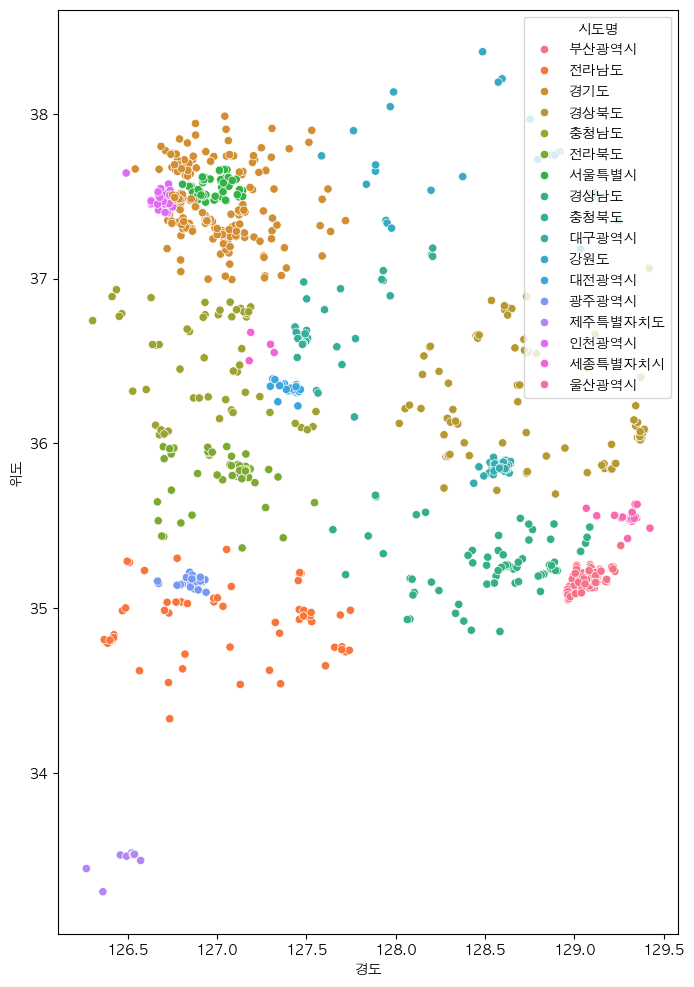

In [96]:
# scatter plot을 통해 folium으로 알 수 없었던 지역 몰림 현상에 대해서도 파악할 수 있었다.
plt.figure(figsize=(8, 12))
sns.scatterplot(data=df_silver, x='경도', y='위도', hue='시도명')